In [12]:
# 导包
import os
from tkinter import *
from PIL import Image, ImageTk
import matplotlib.pyplot as plt
from tqdm import tqdm
import shutil
from sklearn.model_selection import train_test_split
import random

%matplotlib inline
%config InlineBackend.figure_format = 'svg'

In [13]:
os.chdir(r'C:\Users\DREAM\Desktop\MotherCup')

# 1. 图片格式处理
## 1.1 检查图片格式

In [14]:
def check_image_extension(folder_path):
    try:
        # 创建一个字典来统计图片类型数量
        image_type_count = {}

        # 循环遍历文件夹下的所有文件
        for filename in os.listdir(folder_path):
            # 构建完整的文件路径
            file_path = os.path.join(folder_path, filename)

            try:
                # 检查该路径是否为一个文件
                if os.path.isfile(file_path):
                    # 打开图片文件
                    img = Image.open(file_path)

                    # 获取实际图片类型
                    actual_format = img.format.lower()

                    # 获取文件后缀
                    file_extension = filename.split('.')[-1].lower()

                    # 检查后缀是否与实际类型对应
                    if actual_format == file_extension:
                        pass
                    else:
                        print(
                            f"警告：'{filename}', 后缀 '{file_extension}', 实际类型 '{actual_format}' 不匹配.")

                    # 统计实际类型数量
                    if actual_format in image_type_count:
                        image_type_count[actual_format] += 1
                    else:
                        image_type_count[actual_format] = 1

                else:
                    print(f"警告：'{filename}' 不是一个文件。")
            except Exception as e:
                print(f"无法打开文件 '{filename}': {e}")

        # 打印实际类型数量统计结果
        print("\n实际类型数量统计：")
        for image_type, count in image_type_count.items():
            print(f"{image_type}: {count} 个")


    except Exception as e:
        print(f"出现错误：{e}")


def convert(input_folder, output_folder):
    # 创建输出文件夹
    os.makedirs(output_folder, exist_ok=True)

    # 获取输入文件夹中的所有图片文件列表
    image_files = [f for f in os.listdir(input_folder) if
                   f.lower().endswith(('.jpg', '.jpeg', '.png', '.gif', '.bmp', '.tiff', '.webp'))]

    # 使用tqdm显示进度条
    for filename in tqdm(image_files, desc="Converting Images"):
        input_path = os.path.join(input_folder, filename)

        try:
            # 打开图像并保存为PNG格式（质量设为100表示无损）
            img = Image.open(input_path)
            output_path = os.path.join(output_folder, os.path.splitext(filename)[0] + '.png')
            img.save(output_path, 'PNG', quality=100)
        except Exception as e:
            print(f"转换 {filename} 时出错：{e}")

In [15]:
# 检查源材料
check_image_extension('./source')

警告：'normal1.jpg', 后缀 'jpg', 实际类型 'jpeg' 不匹配.
警告：'normal10.jpg', 后缀 'jpg', 实际类型 'jpeg' 不匹配.
警告：'normal100.jpg', 后缀 'jpg', 实际类型 'jpeg' 不匹配.
警告：'normal102.jpg', 后缀 'jpg', 实际类型 'jpeg' 不匹配.
警告：'normal103.jpg', 后缀 'jpg', 实际类型 'jpeg' 不匹配.
警告：'normal105.jpg', 后缀 'jpg', 实际类型 'jpeg' 不匹配.
警告：'normal106.jpg', 后缀 'jpg', 实际类型 'jpeg' 不匹配.
警告：'normal107.jpg', 后缀 'jpg', 实际类型 'jpeg' 不匹配.
警告：'normal108.jpg', 后缀 'jpg', 实际类型 'jpeg' 不匹配.
警告：'normal109.jpg', 后缀 'jpg', 实际类型 'webp' 不匹配.
警告：'normal111.jpg', 后缀 'jpg', 实际类型 'jpeg' 不匹配.
警告：'normal112.jpg', 后缀 'jpg', 实际类型 'jpeg' 不匹配.
警告：'normal114.jpg', 后缀 'jpg', 实际类型 'jpeg' 不匹配.
警告：'normal115.jpg', 后缀 'jpg', 实际类型 'webp' 不匹配.
警告：'normal117.jpg', 后缀 'jpg', 实际类型 'jpeg' 不匹配.
警告：'normal119.jpg', 后缀 'jpg', 实际类型 'jpeg' 不匹配.
警告：'normal12.jpg', 后缀 'jpg', 实际类型 'jpeg' 不匹配.
警告：'normal120.jpg', 后缀 'jpg', 实际类型 'jpeg' 不匹配.
警告：'normal121.jpg', 后缀 'jpg', 实际类型 'jpeg' 不匹配.
警告：'normal122.jpg', 后缀 'jpg', 实际类型 'jpeg' 不匹配.
警告：'normal125.jpg', 后缀 'jpg', 实际类型 'jpeg' 不匹配.
警告：'normal126.jpg

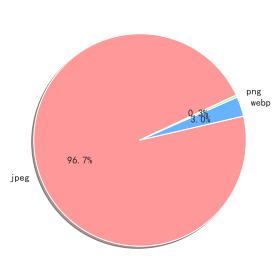

In [16]:
plt.figure()
# 为了支持显示中文设置一下
plt.rcParams["font.sans-serif"] = ["SimHei"]
plt.rcParams["axes.unicode_minus"] = False

plt.pie([291,9,1], labels=["jpeg","webp","png"], autopct='%1.1f%%',
        colors=['#ff9999', '#66b3ff', '#99ff99', '#ffcc99'], shadow=True, startangle=25)

plt.savefig('1.png')
plt.show()

## 1.2 转换图片格式 

In [17]:
convert(r'./source', r'./converted')

Converting Images: 100%|██████████| 301/301 [01:16<00:00,  3.93it/s]


# 2.检查图片质量

In [6]:
class ImageBrowser:
    def __init__(self, folder_path):
        self.folder_path = folder_path
        self.image_files = [f for f in os.listdir(folder_path) if f.lower().endswith(('.jpg', '.jpeg', '.png', '.gif', '.bmp', '.tiff', '.webp'))]
        self.current_index = 0

        self.root = Tk()
        self.root.title("图片浏览器")
        self.root.geometry("500x500")  # 设置窗口大小

        self.root.bind("<Left>", self.show_prev_image)
        self.root.bind("<Right>", self.show_next_image)

        # 显示图片
        self.display_label = Label(self.root)
        self.display_label.pack()

        # 显示图片文件名
        self.filename_label = Label(self.root, text="")
        self.filename_label.pack()

        # 上一张按钮
        self.prev_button = Button(self.root, text="上一张", command=self.show_prev_image)
        self.prev_button.pack(side=LEFT, padx=10)

        # 下一张按钮
        self.next_button = Button(self.root, text="下一张", command=self.show_next_image)
        self.next_button.pack(side=LEFT)

        # 显示第一张图片
        self.show_image()

    def show_image(self):
        img_path = os.path.join(self.folder_path, self.image_files[self.current_index])

        img = Image.open(img_path)
        img.thumbnail((400, 400))
        img = ImageTk.PhotoImage(img)

        self.display_label.configure(image=img)
        self.display_label.image = img

        self.filename_label.config(text=self.image_files[self.current_index])

    def show_next_image(self, event=None):
        if self.current_index < len(self.image_files) - 1:
            self.current_index += 1
            self.show_image()

    def show_prev_image(self, event=None):
        if self.current_index > 0:
            self.current_index -= 1
            self.show_image()

    def run(self):
        self.root.mainloop()

browser = ImageBrowser(r'./converted')
browser.run()

**发现正常道路图片中编号为173 298 346图片质量过差**

In [18]:
folder_path = r'./converted'
output_folder = r'./exclude'  # 将文件移动到的目标文件夹

os.makedirs(output_folder, exist_ok=True)

# 遍历文件夹下的所有文件
for filename in os.listdir(folder_path):
    # 构建完整的文件路径
    file_path = os.path.join(folder_path, filename)

    # 检查文件名是否包含指定字符串
    if '173' in filename or '298' in filename or '346' in filename:
        try:
            # 移动文件
            shutil.move(file_path, output_folder)
            print(f"已移动文件: {filename}")
        except Exception as e:
            print(f"无法移动文件 '{filename}': {e}")

已移动文件: normal173.png
已移动文件: normal298.png
已移动文件: normal346.png


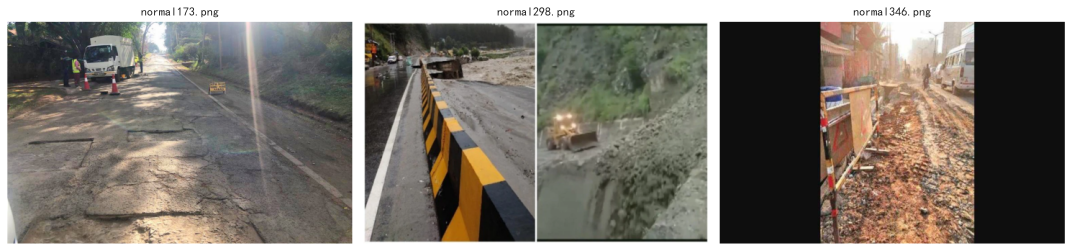

In [16]:
def display_images(folder_path):
    try:
        # 获取文件夹下的所有图片文件
        image_files = [f for f in os.listdir(folder_path) if
                       f.lower().endswith(('.jpg', '.jpeg', '.png', '.gif', '.bmp', '.tiff', '.webp'))]

        # 从文件列表中选择前三张图片
        selected_images = image_files[:3]

        # 设置子图的布局
        fig, axs = plt.subplots(1, 3, figsize=(15, 5))

        for i, image_file in enumerate(selected_images):
            # 构建完整的文件路径
            file_path = os.path.join(folder_path, image_file)

            # 打开图像
            img = Image.open(file_path)

            # 显示图像在子图中
            axs[i].imshow(img, extent=[0, 700, 0, 450])
            axs[i].set_title(image_file)  # 设置为文件名
            axs[i].axis('off')

        # 调整布局
        plt.tight_layout()
        plt.savefig('2.png')
        plt.show()

    except Exception as e:
        print(f"出现错误：{e}")


# 使用示例
display_images('./exclude')

# 3.解决数据集类别失衡问题
## 3.1 可视化失衡情况

In [19]:
directory = "./converted"

normal_count = 0
potholes_count = 0

for filename in os.listdir(directory):
    if "normal" in filename:
        normal_count += 1
    elif "potholes" in filename:
        potholes_count += 1

print("'normal':", normal_count)
print("'potholes':", potholes_count)

'normal': 263
'potholes': 35


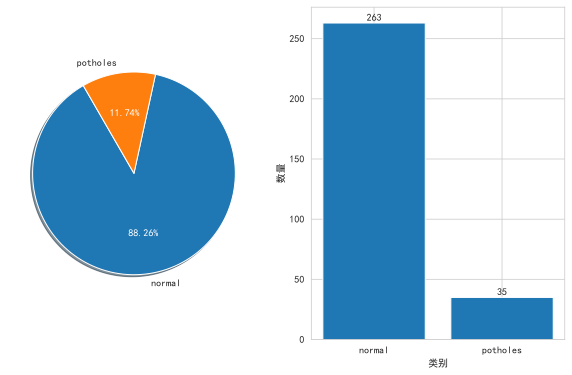

In [35]:
normal_count = 263
potholes_count = 35
# 采用饼图和柱状图可视化失衡情况
fig, axs = plt.subplots(1, 2, figsize=(10, 6))
# 为了支持显示中文设置一下
plt.rcParams["font.sans-serif"] = ["SimHei"]
plt.rcParams["axes.unicode_minus"] = False

# ----------------------- 绘制饼图 ------------------------
plt.subplot(1, 2, 1)
_, _, texts = plt.pie([normal_count, potholes_count], labels=["normal", "potholes"], autopct='%.2f%%', startangle=120, shadow=True)
for t in texts:
    t.set_color('white')

# ----------------------- 绘制柱状图 -----------------------
plt.subplot(1, 2, 2)
plt.bar(["normal", "potholes"], [normal_count, potholes_count])
# 每个柱子添加标签
for x, y in enumerate([normal_count, potholes_count]):
    plt.text(x, y + 0.8, str(y), ha='center', va='bottom')

plt.xlabel("类别")
plt.ylabel("数量")

plt.savefig('3.png')
plt.show()

## 3.2 添加potholes类别数据

In [20]:
convert(r'./sup', r'./converted')

Converting Images: 100%|██████████| 228/228 [01:00<00:00,  3.74it/s]


In [21]:
directory = "./converted"

normal_count = 0
potholes_count = 0

for filename in os.listdir(directory):
    if "normal" in filename:
        normal_count += 1
    elif "potholes" in filename:
        potholes_count += 1

print("'normal':", normal_count)
print("'potholes':", potholes_count)

'normal': 263
'potholes': 263


# 4.建立数据集
## 4.1 按类别划分到dataset

In [22]:
def copy_files_by_keyword(source_directory, destination_directory):
    # 创建目录以存放不同类别的文件
    os.makedirs(os.path.join(destination_directory, 'normal'), exist_ok=True)
    os.makedirs(os.path.join(destination_directory, 'potholes'), exist_ok=True)
    # 获取源目录下的所有文件
    files = os.listdir(source_directory)

    for file in files:
        if 'normal' in file:
            # 如果文件名包含'normal'，将其复制到'normal'文件夹下
            shutil.copy(os.path.join(source_directory, file), os.path.join(destination_directory, 'normal', file))
        elif 'potholes' in file:
            # 如果文件名包含'potholes'，将其复制到'potholes'文件夹下
            shutil.copy(os.path.join(source_directory, file), os.path.join(destination_directory, 'potholes', file))
        else:
            # 其他文件可以被忽略或者进行其他处理
            pass


# 调用函数并指定目录
source_dir = './converted'  # 源目录路径
destination_dir = './dataset'  # 目标目录路径
copy_files_by_keyword(source_dir, destination_dir)

# 使用os.listdir列出目录下的所有文件和文件夹
contents = os.listdir(destination_dir)

# 使用列表推导式筛选出子文件夹的名称
subdirectories = [item for item in contents if os.path.isdir(os.path.join(destination_dir, item))]

# 输出子文件夹的名称和文件数量
for subdirectory in subdirectories:
    subdirectory_path = os.path.join(destination_dir, subdirectory)
    files = os.listdir(subdirectory_path)
    file_count = len(files)
    print(f"{subdirectory}中的文件数量为: {file_count}")

normal中的文件数量为: 263
potholes中的文件数量为: 263


## 4.2 划分测试集和验证集到data

In [23]:
# 定义数据集目录
data_dir = './dataset'

# 检查目录是否存在
if os.path.exists('./data'):
    # 使用shutil.rmtree()删除目录及其内容
    shutil.rmtree('./data')
else:
    print(f"目录 '{'./data'}' 不存在，无需删除。")

# 创建目录以存放训练集和验证集
os.makedirs('./data/train/normal', exist_ok=True)
os.makedirs('./data/train/potholes', exist_ok=True)
os.makedirs('./data/val/normal', exist_ok=True)
os.makedirs('./data/val/potholes', exist_ok=True)

# 分别获取normal和potholes文件夹下的所有文件
normal_files = os.listdir(os.path.join(data_dir, 'normal'))
potholes_files = os.listdir(os.path.join(data_dir, 'potholes'))

# 将normal和potholes数据分别划分为训练集和验证集
normal_train, normal_test = train_test_split(normal_files, test_size=0.15, random_state=None)
potholes_train, potholes_test = train_test_split(potholes_files, test_size=0.15, random_state=None)

# 移动文件到对应目录
for file in normal_train:
    shutil.copy(os.path.join(data_dir, 'normal', file), os.path.join('./data/train/normal', file))
for file in potholes_train:
    shutil.copy(os.path.join(data_dir, 'potholes', file), os.path.join('./data/train/potholes', file))
for file in normal_test:
    shutil.copy(os.path.join(data_dir, 'normal', file), os.path.join('./data/val/normal', file))
for file in potholes_test:
    shutil.copy(os.path.join(data_dir, 'potholes', file), os.path.join('./data/val/potholes', file))

目录 './data' 不存在，无需删除。


# 5.图片增广

In [24]:
def add_salt_and_pepper_noise(image, salt_prob, pepper_prob):
    img = image.copy()
    width, height = img.size
    pixels = img.load()

    for x in range(width):
        for y in range(height):
            rand = random.random()
            if rand < salt_prob:
                pixels[x, y] = (255, 255, 255)  # 设置为白色 (盐)
            elif rand > 1 - pepper_prob:
                pixels[x, y] = (0, 0, 0)  # 设置为黑色 (胡椒)

    return img


def add_salt_and_pepper_noise_to_images(input_folder, output_folder):
    # 创建输出文件夹
    os.makedirs(output_folder, exist_ok=True)

    # 获取输入文件夹中的所有图片文件
    image_files = [f for f in os.listdir(input_folder) if f.endswith(('.jpg', '.png', '.jpeg', '.gif'))]

    # 复制原始文件到输出文件夹，并添加椒盐噪音
    for image_file in tqdm(image_files, desc="Processing Images"):
        input_path = os.path.join(input_folder, image_file)
        output_file = 'Noise_' + image_file
        output_path = os.path.join(output_folder, output_file)

        # 复制原始文件
        shutil.copy(input_path, output_path)

        # 打开副本文件并添加椒盐噪音
        image = Image.open(output_path)
        noisy_image = add_salt_and_pepper_noise(image, salt_prob=random.uniform(0.001, 0.005),
                                                pepper_prob=random.uniform(0.001, 0.005))

        # 保存带有椒盐噪音的副本
        noisy_image.save(output_path)

    print("椒盐噪音添加完成")



input_folder = './data/train/normal'  # 输入文件夹路径
output_folder = './noised/train/normal'  # 输出文件夹路径
add_salt_and_pepper_noise_to_images(input_folder, output_folder)

input_folder = './data/train/potholes'  # 输入文件夹路径
output_folder = './noised/train/potholes'  # 输出文件夹路径
add_salt_and_pepper_noise_to_images(input_folder, output_folder)

input_folder = './data/val/normal'  # 输入文件夹路径
output_folder = './noised/val/normal'  # 输出文件夹路径
add_salt_and_pepper_noise_to_images(input_folder, output_folder)

input_folder = './data/val/potholes'  # 输入文件夹路径
output_folder = './noised/val/potholes'  # 输出文件夹路径
add_salt_and_pepper_noise_to_images(input_folder, output_folder)

Processing Images: 100%|██████████| 223/223 [01:34<00:00,  2.37it/s]


椒盐噪音添加完成


Processing Images: 100%|██████████| 223/223 [01:25<00:00,  2.61it/s]


椒盐噪音添加完成


Processing Images: 100%|██████████| 40/40 [00:19<00:00,  2.04it/s]


椒盐噪音添加完成


Processing Images: 100%|██████████| 40/40 [00:12<00:00,  3.21it/s]

椒盐噪音添加完成


In [26]:
convert(r'./noised', r'./converted')

Converting Images: 100%|██████████| 526/526 [02:11<00:00,  3.99it/s]
